In [2]:
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [69]:
import sys
import csv
import math
import folium
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geojson
from scipy import stats

%matplotlib inline
data4 = pd.read_csv("/home/elena/Documents/DataMining/Data/ElectionData/file_part_00.csv")
data5 = pd.read_csv("/home/elena/Documents/DataMining/Data/CleanedCSVs/2005Cluster.csv")
data6 = pd.read_csv("/home/elena/Downloads/us_postal_codes.csv")



In [22]:

data4.head(6)



,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup,Homogeny
0,2004,AL,Autauga County,1001,15196,4758,127,20081,75.7,23.7,0.6,rep,dem,75.7,52.0,high
1,2004,AL,Baldwin County,1003,52971,15599,750,69320,76.4,22.5,1.1,rep,dem,76.4,53.9,high
2,2004,AL,Barbour County,1005,5899,4832,46,10777,54.7,44.8,0.4,rep,dem,54.7,9.9,low
3,2004,AL,Bibb County,1007,5472,2089,39,7600,72.0,27.5,0.5,rep,dem,72.0,44.5,high
4,2004,AL,Blount County,1009,17386,3938,180,21504,80.9,18.3,0.8,rep,dem,80.9,62.6,high
5,2004,AL,Bullock County,1011,1494,3210,13,4717,31.7,68.1,0.3,dem,rep,68.1,36.4,medium


In [19]:
data5.head()

,zipcode,latitude,longitude,avg_agi,Cluster
0,35004.0,33.601525,-86.489546,3.084004,2
1,35005.0,33.604745,-87.042439,2.785734,1
2,35006.0,33.429346,-87.202099,2.885881,1
3,35007.0,33.228822,-86.791901,3.262145,4
4,35010.0,32.944644,-85.910009,2.642072,1


In [20]:
data4.margin_winner_over_runnerup.describe()

count    3109.000000
mean       27.443680
std        18.383494
min         0.000000
25%        12.100000
50%        24.900000
75%        40.300000
max        84.800000
Name: margin_winner_over_runnerup, dtype: float64

In [21]:
data6 = data6.rename(columns={'Zip Code': 'zipcode'})
data6 = data6.rename(columns={'State': 'state'})
data6.head()

,zipcode,Place Name,state,State Abbreviation,County,Latitude,Longitude
0,501,Holtsville,New York,NY,Suffolk,40.8154,-73.0451
1,544,Holtsville,New York,NY,Suffolk,40.8154,-73.0451
2,1001,Agawam,Massachusetts,MA,Hampden,42.0702,-72.6227
3,1002,Amherst,Massachusetts,MA,Hampshire,42.3671,-72.4646
4,1003,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248


In [23]:
left = data5
right = data6 
#result = left.join(right, on='zipcode')
result = data5.merge(data6, on='zipcode', how='left')
result.head()

,zipcode,latitude,longitude,avg_agi,Cluster,Place Name,state,State Abbreviation,County,Latitude,Longitude
0,35004,33.601525,-86.489546,3.084004,2,Moody,Alabama,AL,St. Clair,33.6035,-86.4668
1,35005,33.604745,-87.042439,2.785734,1,Adamsville,Alabama,AL,Jefferson,33.5884,-86.9597
2,35006,33.429346,-87.202099,2.885881,1,Adger,Alabama,AL,Jefferson,33.4343,-87.1675
3,35007,33.228822,-86.791901,3.262145,4,Alabaster,Alabama,AL,Shelby,33.1934,-86.7944
4,35010,32.944644,-85.910009,2.642072,1,Alexander City,Alabama,AL,Tallapoosa,32.9164,-85.9368


In [24]:
clusterState = pd.DataFrame(result.groupby('state').agg(lambda x:x.value_counts().index[0]))
clusterState.head() 

,zipcode,latitude,longitude,avg_agi,Cluster,Place Name,State Abbreviation,County,Latitude,Longitude
state,,,,,,,,,,
Alabama,36863.0,34.563532,-86.761749,2.813596,1,Birmingham,AL,Jefferson,32.3053,-86.2743
Arizona,85501.0,33.466041,-111.022196,2.884352,1,Phoenix,AZ,Maricopa,33.3992,-112.0893
Arkansas,71749.0,36.220000,-94.212834,2.500000,3,Little Rock,AR,Pulaski,33.0163,-93.2897
California,92056.0,34.063145,-118.352039,3.000000,2,Los Angeles,CA,Los Angeles,34.1510,-118.4490
Colorado,80012.0,40.252021,-107.716250,3.000000,2,Denver,CO,El Paso,39.1032,-105.1009


In [90]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]

  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [13,39]
labels = ["low","medium","high"]
data4["Homogeny"] = binning(data4["margin_winner_over_runnerup"], cut_points, labels = ["low","medium","high"])
pd.value_counts(marginData["margin_winner_over_runnerup"], sort=False)
data4.Homogeny.apply(str)
data4.head()

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup,Homogeny
0,2004,AL,Autauga County,1001,15196,4758,127,20081,75.7,23.7,0.6,rep,dem,75.7,52.0,high
1,2004,AL,Baldwin County,1003,52971,15599,750,69320,76.4,22.5,1.1,rep,dem,76.4,53.9,high
2,2004,AL,Barbour County,1005,5899,4832,46,10777,54.7,44.8,0.4,rep,dem,54.7,9.9,low
3,2004,AL,Bibb County,1007,5472,2089,39,7600,72.0,27.5,0.5,rep,dem,72.0,44.5,high
4,2004,AL,Blount County,1009,17386,3938,180,21504,80.9,18.3,0.8,rep,dem,80.9,62.6,high


In [91]:
polarity = []


# For each row in the column,
for index, row in data4.iterrows():
    if (row.Homogeny == "high") & (row.winner == "rep"):
        polarity.append('Very Republican')
    elif (row.Homogeny  == "medium") & (row.winner  == "rep"):
        polarity.append('Moderately Republican')
    elif (row.Homogeny  == "low") & (row.winner  == "rep"):
        polarity.append('Slighty Republican')
    elif (row.Homogeny  =="high") & (row.winner  == "dem"):
        polarity.append('Very Democrat')
    # else, if more than a value,
    elif (row.Homogeny  == "medium")&(row.winner  == "dem"):
        polarity.append('Moderately Democrat')
    # else, if more than a value,
    elif (row.Homogeny  == "low") &  (row.winner  == "dem"):
        # Append a letter grade
        polarity.append('Slightly Democrat')
        
# Create a column from the list
data4['polarity'] = polarity 
data4 = data4.rename(columns={'state': 'State Abbreviation'})
data4.head()


,year,State Abbreviation,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup,Homogeny,polarity
0,2004,AL,Autauga County,1001,15196,4758,127,20081,75.7,23.7,0.6,rep,dem,75.7,52.0,high,Very Republican
1,2004,AL,Baldwin County,1003,52971,15599,750,69320,76.4,22.5,1.1,rep,dem,76.4,53.9,high,Very Republican
2,2004,AL,Barbour County,1005,5899,4832,46,10777,54.7,44.8,0.4,rep,dem,54.7,9.9,low,Slighty Republican
3,2004,AL,Bibb County,1007,5472,2089,39,7600,72.0,27.5,0.5,rep,dem,72.0,44.5,high,Very Republican
4,2004,AL,Blount County,1009,17386,3938,180,21504,80.9,18.3,0.8,rep,dem,80.9,62.6,high,Very Republican


In [92]:
data4.pct_rep.describe()

count    3109.000000
mean       60.266227
std        12.551834
min         9.300000
25%        52.300000
50%        60.800000
75%        68.900000
max        92.000000
Name: pct_rep, dtype: float64

In [93]:
marginData = pd.DataFrame(data4.groupby('State Abbreviation')['margin_winner_over_runnerup'].mean())
marginData.head()

,margin_winner_over_runnerup
State Abbreviation,
AL,33.511940
AR,15.730667
AZ,20.186667
CA,23.784483
CO,28.193750


In [94]:
marginData.describe()

,margin_winner_over_runnerup
count,49.000000
mean,26.725158
std,13.718742
min,7.706250
25%,18.451961
50%,24.046875
75%,31.474214
max,79.900000


In [95]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]

  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [13,39]
labels = ["low","medium","high"]
marginData["Margins Bin"] = binning(marginData["margin_winner_over_runnerup"], cut_points, labels = ["low","medium","high"])
pd.value_counts(marginData["margin_winner_over_runnerup"], sort=False)
marginData = marginData.rename(columns={'state': 'State Abbreviation'})
marginData.head()



,margin_winner_over_runnerup,Margins Bin
State Abbreviation,,
AL,33.511940,medium
AR,15.730667,medium
AZ,20.186667,medium
CA,23.784483,medium
CO,28.193750,medium


In [135]:
left = clusterState
right = marginData 
resultF = clusterState.join(right, on='State Abbreviation')
resultF.Cluster.apply(int)
resultF.head()


,zipcode,latitude,longitude,avg_agi,Cluster,Place Name,State Abbreviation,County,Latitude,Longitude,margin_winner_over_runnerup,Margins Bin
state,,,,,,,,,,,,
Alabama,36863.0,34.563532,-86.761749,2.813596,1,Birmingham,AL,Jefferson,32.3053,-86.2743,33.511940,medium
Arizona,85501.0,33.466041,-111.022196,2.884352,1,Phoenix,AZ,Maricopa,33.3992,-112.0893,20.186667,medium
Arkansas,71749.0,36.220000,-94.212834,2.500000,3,Little Rock,AR,Pulaski,33.0163,-93.2897,15.730667,medium
California,92056.0,34.063145,-118.352039,3.000000,2,Los Angeles,CA,Los Angeles,34.1510,-118.4490,23.784483,medium
Colorado,80012.0,40.252021,-107.716250,3.000000,2,Denver,CO,El Paso,39.1032,-105.1009,28.193750,medium


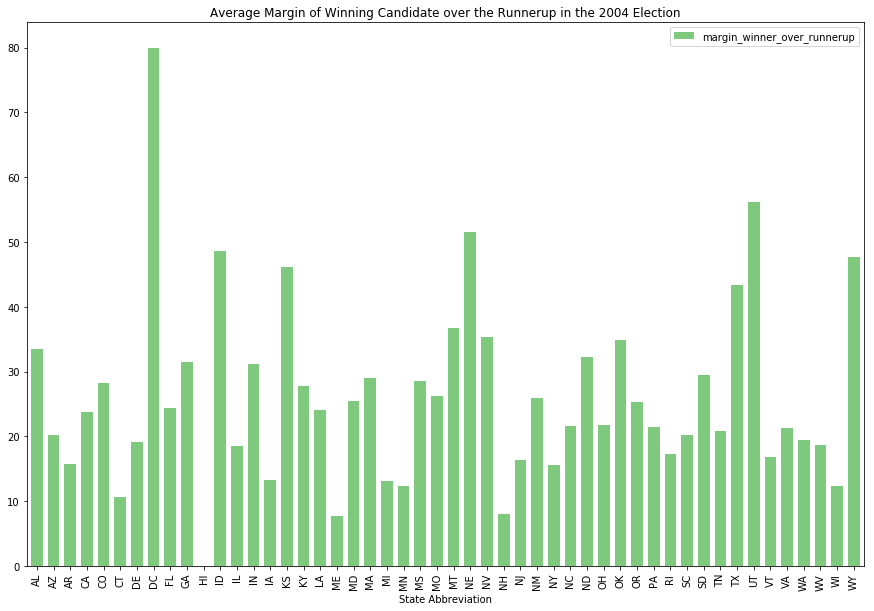

In [136]:
resultF.plot.bar(x= "State Abbreviation", y ="margin_winner_over_runnerup", title = "Average Margin of Winning Candidate over the Runnerup in the 2004 Election",linewidth=4.0,figsize=(15, 10), width = .7, colormap = "Accent")


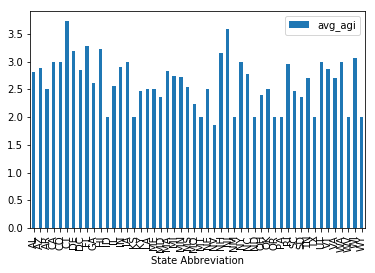

In [138]:
resultF.plot.bar(x= "State Abbreviation", y ="avg_agi")


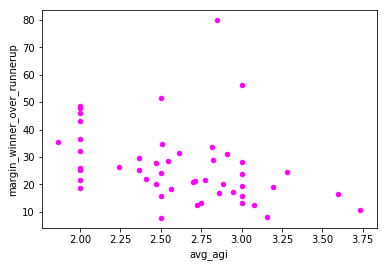

In [139]:
resultF.plot.scatter(x = "avg_agi", y = "margin_winner_over_runnerup", c = "magenta")



In [140]:
resultF.plot.bar("Hegemony", "Cluster")

KeyError: 'Hegemony'

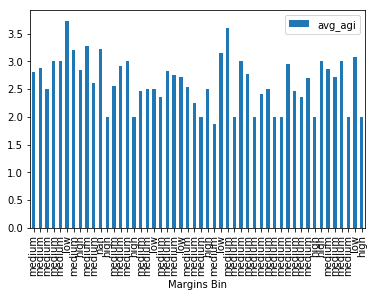

In [89]:
resultF.plot.bar(x = "Margins Bin", y = "avg_agi")

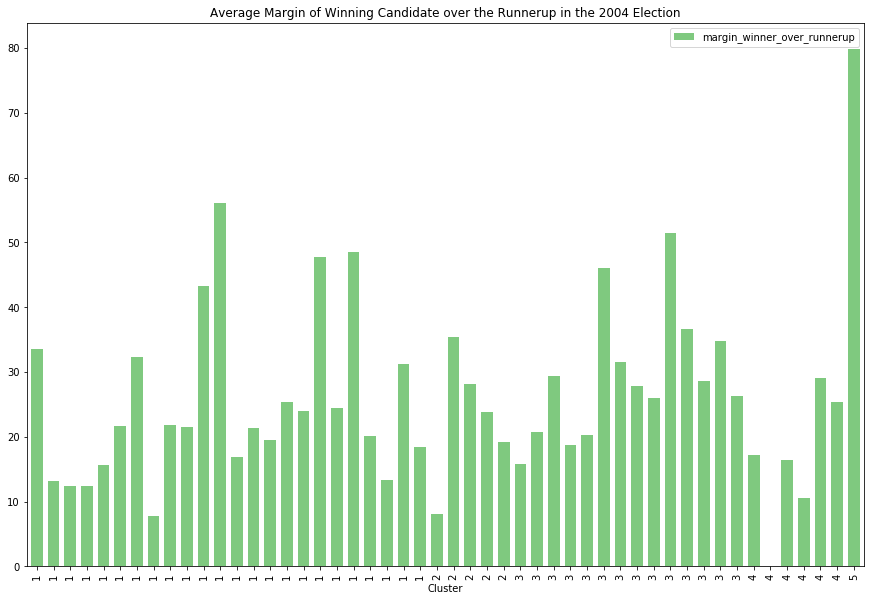

In [145]:
sortedDf = resultF.sort_values(by = "Cluster",  ascending=True)
sortedDf.plot.bar(x= "Cluster", y ="margin_winner_over_runnerup", title = "Average Margin of Winning Candidate over the Runnerup in the 2004 Election", linewidth=4.0,figsize=(15, 10), width = .7, colormap = "Accent")